# The provided code creates a dot plot to visualize the pairwise alignment of two sequences, highlighting matches. 

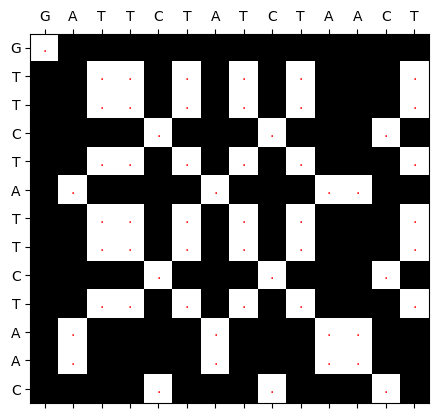

In [8]:
import matplotlib.pyplot as plt

def pairwise_alignment_dot_plot(seq1, seq2, threshold=0.8):
    matrix = [[1 if seq1[i] == seq2[j] else 0 for j in range(len(seq2))] for i in range(len(seq1))]

    fig, ax = plt.subplots()
    ax.matshow(matrix, cmap='gray')

    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if matrix[i][j] >= threshold:
                ax.text(j, i, '.', ha='center', va='center', color='red')

    ax.set_xticks(range(len(seq2)))
    ax.set_xticklabels(list(seq2))

    ax.set_yticks(range(len(seq1)))
    ax.set_yticklabels(list(seq1))

    plt.show()

sequence2= "GATTCTATCTAACT"
sequence1 = "GTTCTATTCTAAC"
pairwise_alignment_dot_plot(sequence1, sequence2)


In [1]:
import numpy as np

def needleman(seq1, seq2, match=2, mismatch=-1, gap_penalty=-2):
    len_seq1 = len(seq1)
    len_seq2 = len(seq2)

    matrix = np.zeros((len_seq1 + 1, len_seq2 + 1))

    for i in range(len_seq1 + 1):
        matrix[i][0] = i * gap_penalty

    for j in range(len_seq2 + 1):
        matrix[0][j] = j * gap_penalty

    for i in range(1, len_seq1 + 1):
        for j in range(1, len_seq2 + 1):
            match_score = matrix[i - 1][j - 1] + (match if seq1[i - 1] == seq2[j - 1] else mismatch)
            delete_score = matrix[i - 1][j] + gap_penalty
            insert_score = matrix[i][j - 1] + gap_penalty

            matrix[i][j] = max(match_score, delete_score, insert_score)

    return matrix

def visualize_matrix(matrix):
    for row in matrix:
        print(row)

sequence1 = "ACGGCTC"

sequence2 = "ATGGCCTC"

alignment_matrix = needleman(sequence1, sequence2)
visualize_matrix(alignment_matrix)



[  0.  -2.  -4.  -6.  -8. -10. -12. -14. -16.]
[ -2.   2.   0.  -2.  -4.  -6.  -8. -10. -12.]
[-4.  0.  1. -1. -3. -2. -4. -6. -8.]
[-6. -2. -1.  3.  1. -1. -3. -5. -7.]
[-8. -4. -3.  1.  5.  3.  1. -1. -3.]
[-10.  -6.  -5.  -1.   3.   7.   5.   3.   1.]
[-12.  -8.  -4.  -3.   1.   5.   6.   7.   5.]
[-14. -10.  -6.  -5.  -1.   3.   7.   5.   9.]
